In [1]:
#PREDICT EURO Value againtes other foriegn currency exhange rates


In [2]:
#import required libraries
import numpy as np
import pandas as pd

import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data set
forex_data = pd.read_csv('/content/ECB_FX_USD-quote.csv')
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,#date,#value+eur,#value+jpy,#value+bgn,#value+czk,#value+dkk,#value+gbp,#value+huf,#value+pln,#value+ron,...,#value+ils,#value+inr,#value+krw,#value+mxn,#value+myr,#value+nzd,#value+php,#value+sgd,#value+thb,#value+zar
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623


In [4]:
#Remove First Row
forex_data =  forex_data.drop(0)


In [5]:
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623
5,2022-05-16,1.0422,0.007719428190504408,0.532876572246651,0.042177256171590446,0.1400467628799484,1.2254688694220706,0.0027010496306854996,0.22328869844670593,0.2106773939234672,...,0.2937926368607994,0.012853812853812853,0.0007789819866955677,0.04978884408858993,0.22737586176804261,0.6277935064152762,0.019051275020564848,0.7172252425848187,0.028731322710481337,0.06159756493986229


<Figure size 864x576 with 0 Axes>

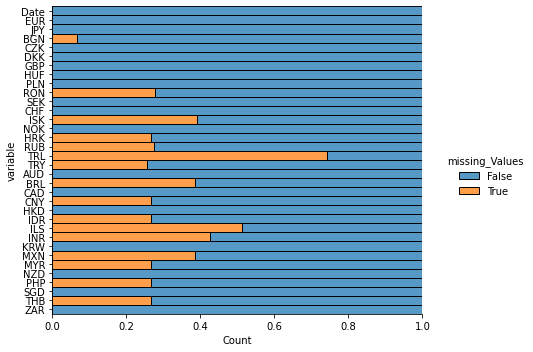

In [6]:
#Plot data to indentify missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)
plt.savefig("visualizing_missing_data.png", dpi=100)


In [7]:
#Dropping currecnys with missing values(more than 50%)

forex_data.drop(columns=['TRL'],inplace=True)

forex_data.drop(columns=['ILS'],inplace=True)

forex_data.drop(columns=['INR'],inplace=True)

forex_data.drop(columns=['ISK'],inplace=True)

forex_data.drop(columns=['BRL'],inplace=True)

forex_data.drop(columns=['MXN'],inplace=True)

<Figure size 864x576 with 0 Axes>

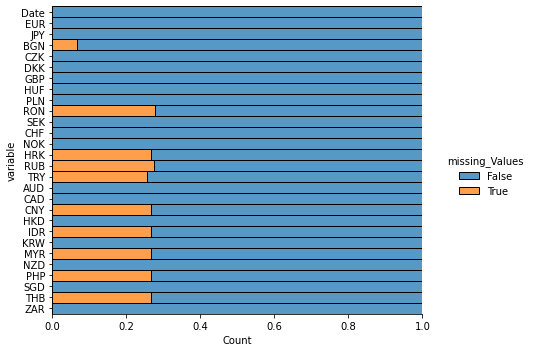

In [8]:
#Plot data after removing missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)

In [9]:
#existing null value conut

forex_data.isnull().sum()

Date       0
EUR        0
JPY        0
BGN      398
CZK        0
DKK        0
GBP        0
HUF        0
PLN        0
RON     1664
SEK        0
CHF        0
NOK        0
HRK     1599
RUB     1655
TRY     1537
AUD        0
CAD        0
CNY     1599
HKD        0
IDR     1599
KRW        0
MYR     1599
NZD        0
PHP     1599
SGD        0
THB     1599
ZAR        0
dtype: int64

In [10]:
#Describe
forex_data.describe()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,CNY,HKD,IDR,KRW,MYR,NZD,PHP,SGD,THB,ZAR
count,5988,5988,5988,5590,5988,5988,5988,5988,5988,4324,...,4389,5988,4389,5988,4389,5988,4389,5988,4389,5988
unique,5988,3609,5983,3922,5977,5967,5984,5988,5988,4322,...,4382,5936,4346,5978,4383,5986,4382,5983,4381,5984
top,2022-05-20,1.2276,0.009709060094626085,0.5734226403517741,0.05059346607384497,0.16038192576654117,1.5630750038983314,0.00276212362572794,0.22812466300010786,0.24944604021337713,...,0.12082393625018795,0.12903225806451613,9.09090909090909e-05,0.0007692307692307692,0.28567040393180776,0.5154549634700862,0.02,0.6260014197343068,0.03333333333333333,0.14285714285714288
freq,1,9,2,8,2,2,2,1,1,2,...,2,14,5,6,2,2,3,2,4,2


In [11]:
#Identify data type missmatching issues
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 1 to 5988
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5988 non-null   object
 1   EUR     5988 non-null   object
 2   JPY     5988 non-null   object
 3   BGN     5590 non-null   object
 4   CZK     5988 non-null   object
 5   DKK     5988 non-null   object
 6   GBP     5988 non-null   object
 7   HUF     5988 non-null   object
 8   PLN     5988 non-null   object
 9   RON     4324 non-null   object
 10  SEK     5988 non-null   object
 11  CHF     5988 non-null   object
 12  NOK     5988 non-null   object
 13  HRK     4389 non-null   object
 14  RUB     4333 non-null   object
 15  TRY     4451 non-null   object
 16  AUD     5988 non-null   object
 17  CAD     5988 non-null   object
 18  CNY     4389 non-null   object
 19  HKD     5988 non-null   object
 20  IDR     4389 non-null   object
 21  KRW     5988 non-null   object
 22  MYR     4389 non-null   

In [12]:
#Conver dictornary

curruncy_type_map = {

     'EUR':float,

     'JPY':float,

     'BGN':float,

     'CZK':float,

     'DKK':float,

     'GBP':float,

     'HUF':float,

     'PLN':float,

     'RON':float,

     'SEK':float,

     'CHF':float,

      'NOK':float,

     'HRK':float,

     'RUB':float,

     'TRY':float,

     'AUD':float,

     'CAD':float,

     'CNY':float,

      'HKD':float,

     'IDR':float,

     'KRW':float,

     'MYR':float,

     'NZD':float,

     'PHP':float,  

     'SGD':float,

     'THB':float,

     'ZAR':float,

    
}
#Converte curruncy values in float data type
forex_data = forex_data.astype(curruncy_type_map)

In [13]:
#Verify data type conversion
forex_data.info()
#Describe
forex_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 1 to 5988
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5988 non-null   object 
 1   EUR     5988 non-null   float64
 2   JPY     5988 non-null   float64
 3   BGN     5590 non-null   float64
 4   CZK     5988 non-null   float64
 5   DKK     5988 non-null   float64
 6   GBP     5988 non-null   float64
 7   HUF     5988 non-null   float64
 8   PLN     5988 non-null   float64
 9   RON     4324 non-null   float64
 10  SEK     5988 non-null   float64
 11  CHF     5988 non-null   float64
 12  NOK     5988 non-null   float64
 13  HRK     4389 non-null   float64
 14  RUB     4333 non-null   float64
 15  TRY     4451 non-null   float64
 16  AUD     5988 non-null   float64
 17  CAD     5988 non-null   float64
 18  CNY     4389 non-null   float64
 19  HKD     5988 non-null   float64
 20  IDR     4389 non-null   float64
 21  KRW     5988 non-null   float64
 22  

,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,CNY,HKD,IDR,KRW,MYR,NZD,PHP,SGD,THB,ZAR
count,5988.000000,5988.000000,5590.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,4324.000000,5988.000000,...,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000,4389.000000,5988.000000
mean,1.197371,0.009471,0.618686,0.043380,0.160753,1.561889,0.004249,0.290220,0.295604,0.127228,...,0.148168,0.128522,0.000090,0.000889,0.275643,0.667506,0.021162,0.687051,0.030358,0.111917
std,0.158157,0.001263,0.079349,0.009171,0.021186,0.207883,0.000782,0.048348,0.057346,0.018481,...,0.011375,0.000452,0.000017,0.000079,0.033805,0.114494,0.001717,0.081993,0.002251,0.034035
min,0.825200,0.007418,0.424028,0.023699,0.110868,1.159837,0.002697,0.212185,0.209989,0.090564,...,0.120823,0.127388,0.000060,0.000632,0.222348,0.392030,0.017763,0.539303,0.023732,0.052436
25%,1.101475,0.008590,0.571173,0.039112,0.147744,1.405618,0.003553,0.253846,0.245446,0.113345,...,0.144162,0.128213,0.000073,0.000842,0.241734,0.618446,0.019711,0.596808,0.029057,0.075741
50%,1.193200,0.009158,0.618305,0.044238,0.160193,1.561633,0.004245,0.272142,0.292226,0.123383,...,0.149175,0.128610,0.000087,0.000881,0.273450,0.687453,0.021034,0.714690,0.030708,0.118701
75%,1.314225,0.009768,0.675631,0.049620,0.176494,1.657185,0.004782,0.319832,0.333669,0.143235,...,0.157147,0.128937,0.000108,0.000924,0.308121,0.737894,0.022631,0.743092,0.032013,0.141090
max,1.599000,0.013198,0.817568,0.069174,0.214352,2.106427,0.006949,0.493156,0.447877,0.171058,...,0.165486,0.130629,0.000118,0.001110,0.340193,0.881819,0.024863,0.833285,0.034965,0.177974
